## Introduction

Welcome!, this tut will show you how to visualise Rooibos tea data, using python. the tut will give you an expousre in the following:

 - how to read data from an excel file
 - how to use dataframes (pandas package)
 - how to visualise fermented and unfermented rooibos tea using histograms
 - how to use google
 

Now let us start

first let us call some packeges that will help us during the tut

In [1]:
import pandas as pd # import panda package, and we call it pd. (saves the data as a data frame fromat)
import seaborn as sns # this package will be use to draw some usful graphs (like bar graphs)



The following code does the following:
- read a data from a CSV file
- coverts the csv file formar into a 

In [4]:
df_fer = pd.read_excel('data/orig.xlsx',  sheet_name='fer') # change the directory
# df_fer ~ data frame fermented
df_nf = pd.read_excel('data/orig.xlsx',  sheet_name='nonfer') # change the directory
# df_fer ~ data frame non-fermented

# Notice: 
    # both fer/nf can be found in the same excel sheet "orig.xlsx", but the sheet name is different

Now let us viualise the fermented an non fermented data

In [5]:
print(df_nf.head(5)) # shows the 1st 5 rows of the data frame (nonfermented data)


   type      F-MEOH      A1-MEOH      A2-MEOH   F-H2O   A1-H2O  A2-H2O cut
0     0  275.767474  2821.888864  1180.778887  314.33  2588.61  584.61  FC
1     0  253.494375  2355.706326   647.096605  331.41  2818.87  589.91  LL
2     0  255.307044  2182.134125   729.411993  269.64  2432.14  551.30  LL
3     0  275.360573  2469.683915   842.797272  210.76  1979.52  402.41  LL
4     0  303.070769  2546.362880   905.330599  199.87  1865.86  365.39  LL


In [6]:
print(df_fer.head(5)) # shows the 1st 5 rows of the data frame (fermented data)


   type       F-H2O       A1-H2O       A2-H2O      F-MEOH      A1-MEOH  \
0     1  457.982012  3791.630281  1053.209972  257.631541  2063.016672   
1     1  339.713588  2825.660880   627.777353  266.472210  2103.093927   
2     1  348.809862  3363.905754   657.584108  251.443587  2052.680936   
3     1  221.543574  2000.789922   360.611685  250.451620  1963.529348   
4     1  347.776623  3024.878290   730.545849  240.960000  1950.643883   

      A2-MEOH cut  
0  829.673865  RS  
1  627.469976  RS  
2  892.081366  RS  
3  662.888570  RS  
4  548.189385  RS  


now to show the size of each data sample

In [7]:
# for nonfermented
print("the shape of the nonfermented data:"+str(df_nf.shape) ) 
# this line "df_fer.shape" produces a tuple of 2 number, we can access them as follows: 
print("where " + str(df_nf.shape[0]) +" is the rows")
print("where " + str(df_nf.shape[1]) +" is the col")

the shape of the nonfermented data:(47, 8)
where 47 is the rows
where 8 is the col


In [8]:
# Now please do the same on the fermented data

#  ___ code here ____




<img src="pics/roo.jpg" width="500" height="250">


each dataframe (fer/nf) has 8 variables, which can be explained as follows:
-  type: which is a catagorical number, we have two types "Nonfermented = 0"/ "Fermented = 1"
#### Water Extract
- F-H2O: a continuous number, F stands for phenolics and H2O stands for water extract. which means the phenolic content was extracted using water
- A1-H2O : a continuous number, A1 is a symbol for TEACK which is type of antioxidant activity, H20 again because the extract was water 
- A2-H2O : a continuous number, A2 is a symbol for FRAP which is a type of antioxidant activity. 
#### Methanol extract
- F-MEOH: a continuous number, F stands for phenolics and methanol stands for water extract. which means the phenolic content was extracted using methanol
- A1-MEOH : a continuous number, A1 is a symbol for Teac which is a type of antioxidant activity, MEOH again because the extract was methanol 
- A2-MEOH : a continuous number, A2 is a symbol for FRAP which is a type of antioxidant activity. 

- cut: Catagorical value, just shows the the cut of the rooibos (not importnat)

#### after explaining the variables, we notice that the names of the variables are not ideal, how about we change them.

Now let us go to goole and ask, how to change this. beacuse cuurently I dont have the code memorized inside my head.

<img src="pics/google.png" width="400" height="200">


Searching the following term
 ##### "how to change columns names in pandas"

# let us check the following link
 - https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
 - the principle is that you keep trying untill you get it, but dont worry things will get easier with time

In [9]:
# df.rename({'$a':'a', '$b':'b', '$c':'c', '$d':'d', '$e':'e'}, axis='columns')
# let us try the above line of code, adjust it first , and see whether it work or not

df_nf = df_nf.rename({'F-H2O':'TPC_H2O', 'A1-H2O':'TEAC_H2O', 'A2-H2O':'FRAP_H2O',
                      'F-MEOH':'TPC_MEOH', 'A1-MEOH':'TEAC_MEOH', 'A2-MEOH':'FRAP_MEOH'}, axis='columns')
# Notice: you need to re-assign the data frame to it self for you to save the changes

df_fer = df_fer.rename({'F-H2O':'TPC_H2O', 'A1-H2O':'TEAC_H2O', 'A2-H2O':'FRAP_H2O',
                      'F-MEOH':'TPC_MEOH', 'A1-MEOH':'TEAC_MEOH', 'A2-MEOH':'FRAP_MEOH'}, axis='columns')

In [10]:
print(df_nf.head(3))
print()
print(df_fer.head(3))

   type    TPC_MEOH    TEAC_MEOH    FRAP_MEOH  TPC_H2O  TEAC_H2O  FRAP_H2O cut
0     0  275.767474  2821.888864  1180.778887   314.33   2588.61    584.61  FC
1     0  253.494375  2355.706326   647.096605   331.41   2818.87    589.91  LL
2     0  255.307044  2182.134125   729.411993   269.64   2432.14    551.30  LL

   type     TPC_H2O     TEAC_H2O     FRAP_H2O    TPC_MEOH    TEAC_MEOH  \
0     1  457.982012  3791.630281  1053.209972  257.631541  2063.016672   
1     1  339.713588  2825.660880   627.777353  266.472210  2103.093927   
2     1  348.809862  3363.905754   657.584108  251.443587  2052.680936   

    FRAP_MEOH cut  
0  829.673865  RS  
1  627.469976  RS  
2  892.081366  RS  


Now let us visualize the data using hist graphs

### Concat two dataframes
To make our live easier during visualisation, let us try to concat the to data frames together (nf/fer).

In [11]:
frames = [df_nf, df_fer]
df = pd.concat(frames, ignore_index=True)


In [12]:
print(df.head(50))
print(df.shape)

    type    TPC_MEOH    TEAC_MEOH    FRAP_MEOH     TPC_H2O     TEAC_H2O  \
0      0  275.767474  2821.888864  1180.778887  314.330000  2588.610000   
1      0  253.494375  2355.706326   647.096605  331.410000  2818.870000   
2      0  255.307044  2182.134125   729.411993  269.640000  2432.140000   
3      0  275.360573  2469.683915   842.797272  210.760000  1979.520000   
4      0  303.070769  2546.362880   905.330599  199.870000  1865.860000   
5      0  208.467416  2328.589410  1026.923101  340.020000  2860.030000   
6      0  240.781730  2218.889808   778.735748  253.060000  2272.900000   
7      0  344.924530  2647.415681   878.163675  345.480000  3061.200000   
8      0  312.617225  2289.549736   845.293529  380.620000  3150.030000   
9      0  283.600633  2492.641528   957.291769  273.960000  2309.360000   
10     0  342.938849  2591.051757  1245.695080  433.100000  3549.770000   
11     0  315.600775  2229.834957   823.860285  285.150000  2415.170000   
12     0  402.884777  251

### Now let us do some histogrames

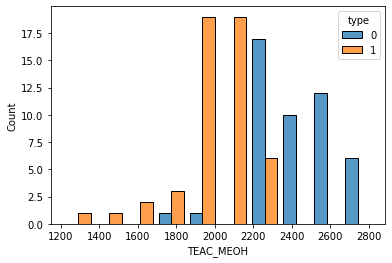

In [13]:
sns.histplot(data=df, x="TEAC_MEOH", hue="type", multiple="dodge", shrink=.8)


 - nonfermented (Orange) is a left skewed histogram
 - fermented (blue) left skewed, or a biomodel distribution

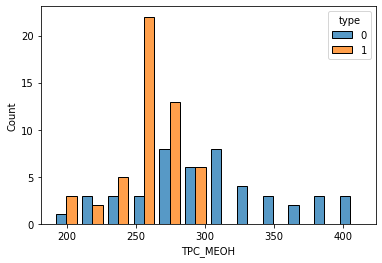

In [14]:
sns.histplot(data=df, x="TPC_MEOH", hue="type", multiple="dodge", shrink=.8)


 - nonfermented (Orange) is a left skewed histogram
 - fermented (blue) has a unimodel distribution with a large varince (the data is spread out)

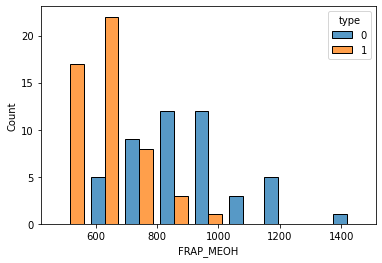

In [15]:
sns.histplot(data=df, x="FRAP_MEOH", hue="type", multiple="dodge", shrink=.8)


 - nonfermented (Orange) is a right skewed histogram
 - fermented (blue) has a unimodel distribution

### now do it for the water extract

In [16]:
#-------  Code here (TPC) -----------

In [17]:
#-------  Code here (TEAC) -----------

In [18]:
#-------  Code here (FRAP) -----------

In [19]:
import numpy as np

### Now let us save the data so we can call it again in another notebook

In [20]:
%store df_nf
%store df_fer
%store df

Stored 'df_nf' (DataFrame)
Stored 'df_fer' (DataFrame)
Stored 'df' (DataFrame)
